**Project-3**

**IPL Analysis 2007**

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

**analysis according to dataset of ipl 2017**

Dataset of venues

In [3]:
matches=pd.read_excel(r"C:\Users\Jatin Yadav\Desktop\project\Week_3\IPL-2007 dataset\DIM_MATCH.xlsx")

In [4]:
matches


,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id
0,546,980964,Royal Challengers Bangalore,Kolkata Knight Riders,2016-05-02,2016,M Chinnaswamy Stadium,Bangalore,India,Kolkata Knight Riders,Kolkata Knight Riders,field,wickets,Result,AD Russell,5.0,1
1,547,980966,Gujarat Lions,Delhi Daredevils,2016-05-03,2016,Saurashtra Cricket Association Stadium,Rajkot,India,Delhi Daredevils,Delhi Daredevils,field,wickets,Result,RR Pant,8.0,1
2,548,980968,Kolkata Knight Riders,Kings XI Punjab,2016-05-04,2016,Eden Gardens,Kolkata,India,Kings XI Punjab,Kolkata Knight Riders,field,runs,Result,AD Russell,7.0,1
3,549,980970,Delhi Daredevils,Rising Pune Supergiants,2016-05-05,2016,Feroz Shah Kotla,Delhi,India,Rising Pune Supergiants,Rising Pune Supergiants,field,wickets,Result,AM Rahane,7.0,1
4,550,980972,Sunrisers Hyderabad,Gujarat Lions,2016-05-06,2016,"Rajiv Gandhi International Stadium, Uppal",Hyderabad,India,Sunrisers Hyderabad,Sunrisers Hyderabad,field,wickets,Result,B Kumar,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,541,980954,Rising Pune Supergiants,Gujarat Lions,2016-04-29,2016,Maharashtra Cricket Association Stadium,Pune,India,Gujarat Lions,Gujarat Lions,field,wickets,Result,DR Smith,3.0,1
633,542,980956,Delhi Daredevils,Kolkata Knight Riders,2016-04-30,2016,Feroz Shah Kotla,Delhi,India,Kolkata Knight Riders,Delhi Daredevils,field,runs,Result,CR Brathwaite,27.0,1
634,543,980958,Sunrisers Hyderabad,Royal Challengers Bangalore,2016-04-30,2016,"Rajiv Gandhi International Stadium, Uppal",Hyderabad,India,Royal Challengers Bangalore,Sunrisers Hyderabad,field,runs,Result,DA Warner,15.0,1
635,544,980960,Gujarat Lions,Kings XI Punjab,2016-05-01,2016,Saurashtra Cricket Association Stadium,Rajkot,India,Gujarat Lions,Kings XI Punjab,field,runs,Result,AR Patel,23.0,1


In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Match_SK      637 non-null    int64         
 1   match_id      637 non-null    int64         
 2   Team1         637 non-null    object        
 3   Team2         637 non-null    object        
 4   match_date    637 non-null    datetime64[ns]
 5   Season_Year   637 non-null    int64         
 6   Venue_Name    636 non-null    object        
 7   City_Name     637 non-null    object        
 8   Country_Name  637 non-null    object        
 9   Toss_Winner   636 non-null    object        
 10  match_winner  634 non-null    object        
 11  Toss_Name     636 non-null    object        
 12  Win_Type      635 non-null    object        
 13  Outcome_Type  637 non-null    object        
 14  ManOfMach     633 non-null    object        
 15  Win_Margin    628 non-null    float64   

In [6]:
a=matches.Win_Margin.median()
matches.Win_Margin.fillna(a,inplace=True)
matches.dropna(inplace=True)

In [7]:
matches['Toss_Name'] = matches['Toss_Name'].str.replace('bat', 'Bat')
matches['Toss_Name'] = matches['Toss_Name'].str.replace('field','Field')

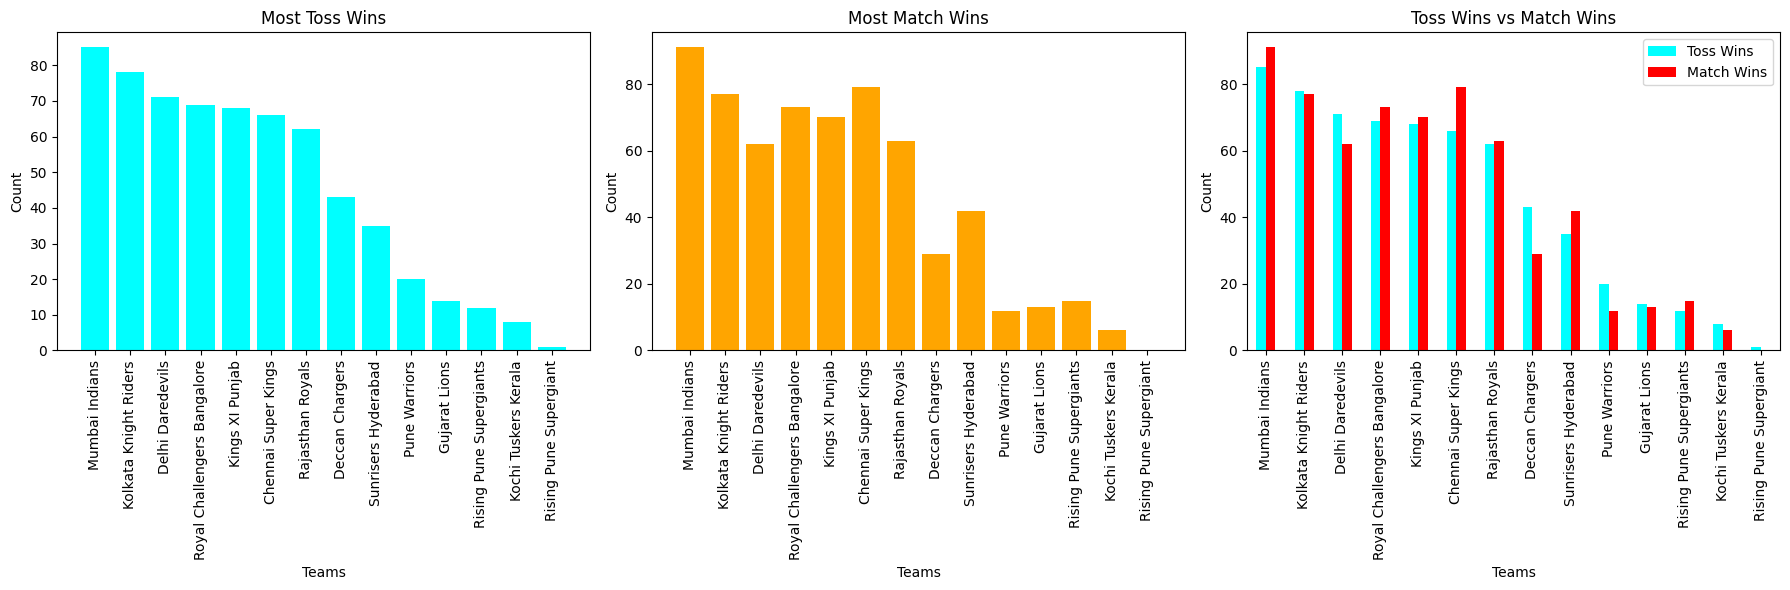

In [8]:

toss_win_counts = matches['Toss_Winner'].value_counts(sort=True)
match_win_counts = matches['match_winner'].value_counts(sort=True)

# Create DataFrames for toss wins and match wins
toss_wins_matches = pd.DataFrame({'Team': toss_win_counts.index, 'Toss_Wins': toss_win_counts.values})
match_wins_matches = pd.DataFrame({'Team': match_win_counts.index, 'Match_Wins': match_win_counts.values})

# Merge the two DataFrames based on the team names
team_stats = pd.merge(toss_wins_matches, match_wins_matches, on='Team', how='outer').fillna(0)

# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot most toss wins
axes[0].bar(team_stats['Team'], team_stats['Toss_Wins'], color='aqua')
axes[0].set_title('Most Toss Wins')
axes[0].set_xlabel('Teams')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

# Plot most match wins
axes[1].bar(team_stats['Team'], team_stats['Match_Wins'], color='orange')
axes[1].set_title('Most Match Wins')
axes[1].set_xlabel('Teams')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

# Plot toss wins vs match wins
team_stats.plot(x='Team', kind='bar', color=['aqua', 'red'], ax=axes[2])
axes[2].set_title('Toss Wins vs Match Wins')
axes[2].set_xlabel('Teams')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=90)
axes[2].legend(['Toss Wins', 'Match Wins'])

plt.tight_layout()
plt.show()


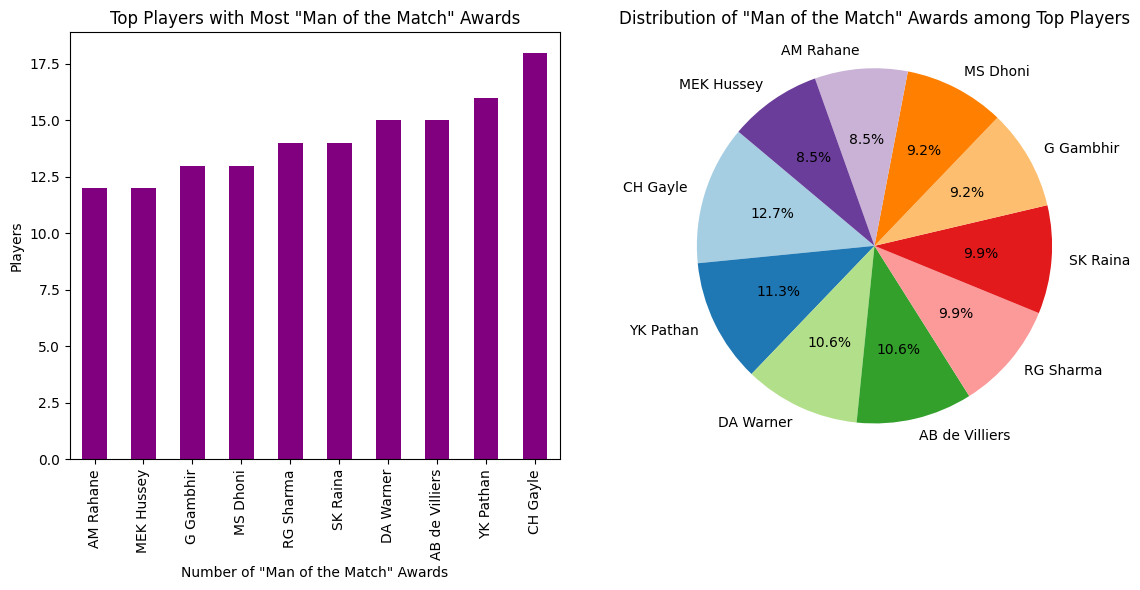

In [9]:


# Count the number of times each player got "Man of the Match"
man_of_the_match_counts = matches['ManOfMach'].value_counts(sort=True)

# Select the top N players with the most awards to display
top_players = man_of_the_match_counts[:10]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the horizontal bar chart on the first subplot
top_players.sort_values().plot(kind='bar', color='purple', ax=ax1)
ax1.set_ylabel('Players')
ax1.set_xlabel('Number of "Man of the Match" Awards')
ax1.set_title('Top Players with Most "Man of the Match" Awards')

# Plotting the pie chart on the second subplot
ax2.pie(top_players, labels=top_players.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
ax2.set_title('Distribution of "Man of the Match" Awards among Top Players')
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()


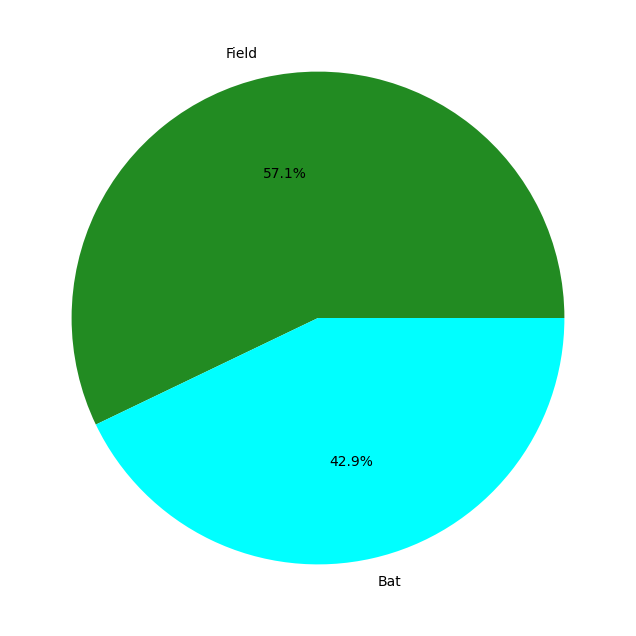

In [10]:
#decision after winning the toss
toss_decision=matches['Toss_Name'].value_counts(sort=True)
fig=plt.figure(figsize=(10,8))
plt.pie(toss_decision,labels=toss_decision.index,autopct='%1.1f%%',colors=['forestgreen','aqua'])
plt.show()

**Dataset of players**

In [11]:
player=pd.read_excel(r"C:\Users\Jatin Yadav\Desktop\project\Week_3\IPL-2007 dataset\DIM_PLAYER (3).xlsx")

In [12]:
player.isnull().sum()

PLAYER_SK         0
Player_Id         0
Player_Name       0
DOB               0
Batting_hand      0
Bowling_skill    46
Country_Name      0
dtype: int64

In [13]:
player['Bowling_skill'].fillna("N/A",inplace=True)

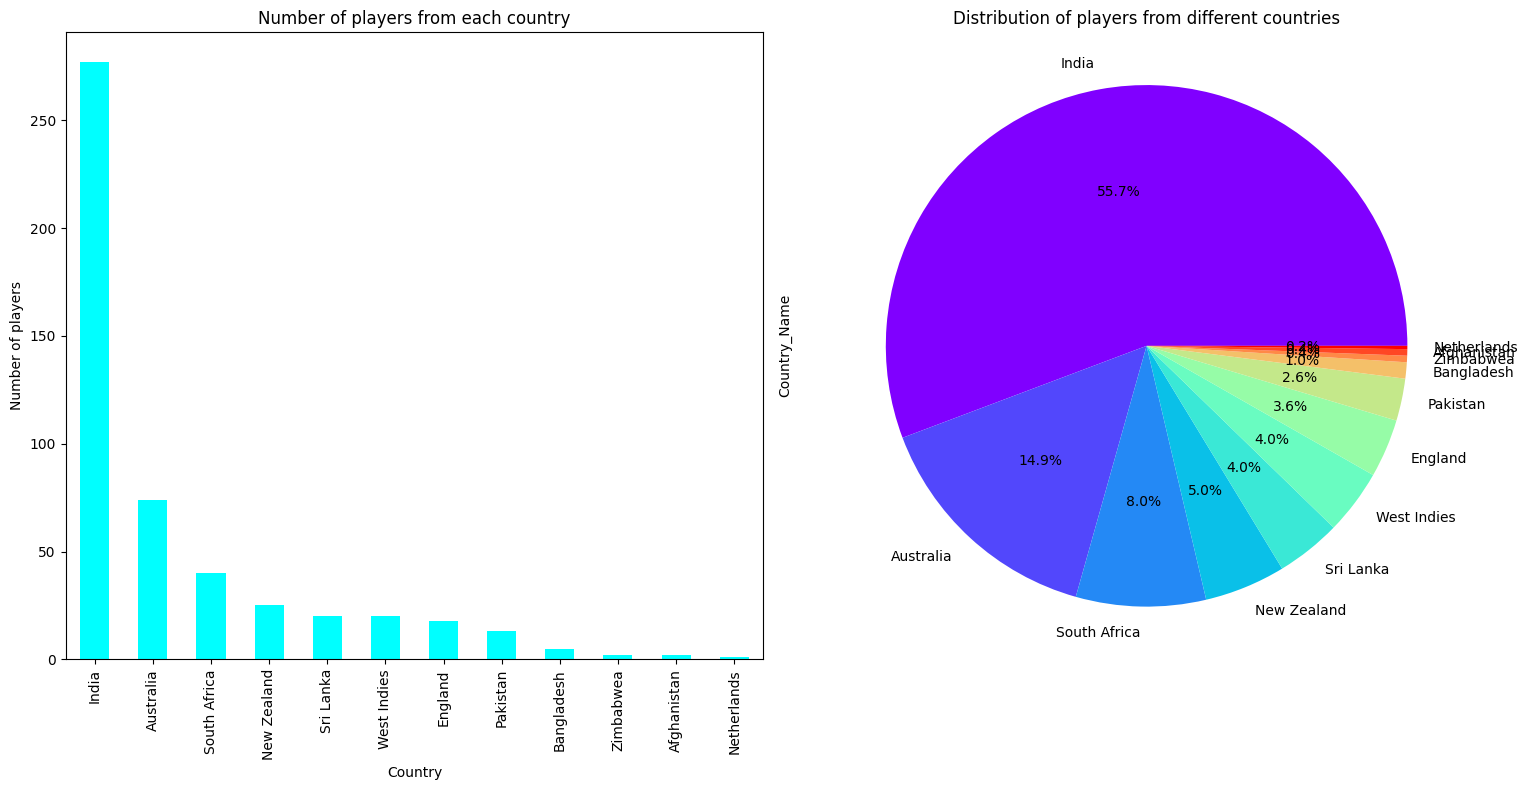

In [14]:

player_country=player['Country_Name'].value_counts(sort=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
player_country.plot(kind='bar', color='aqua', ax=ax1)
ax1.set_ylabel('Number of players')
ax1.set_xlabel('Country')
ax1.set_title('Number of players from each country')

player_country.plot(kind='pie',labels=player_country.index,colormap='rainbow',autopct='%1.1f%%')
ax2.set_title('Distribution of players from different countries')
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.



# Adjust layout and display the subplots
plt.tight_layout()
plt.show()




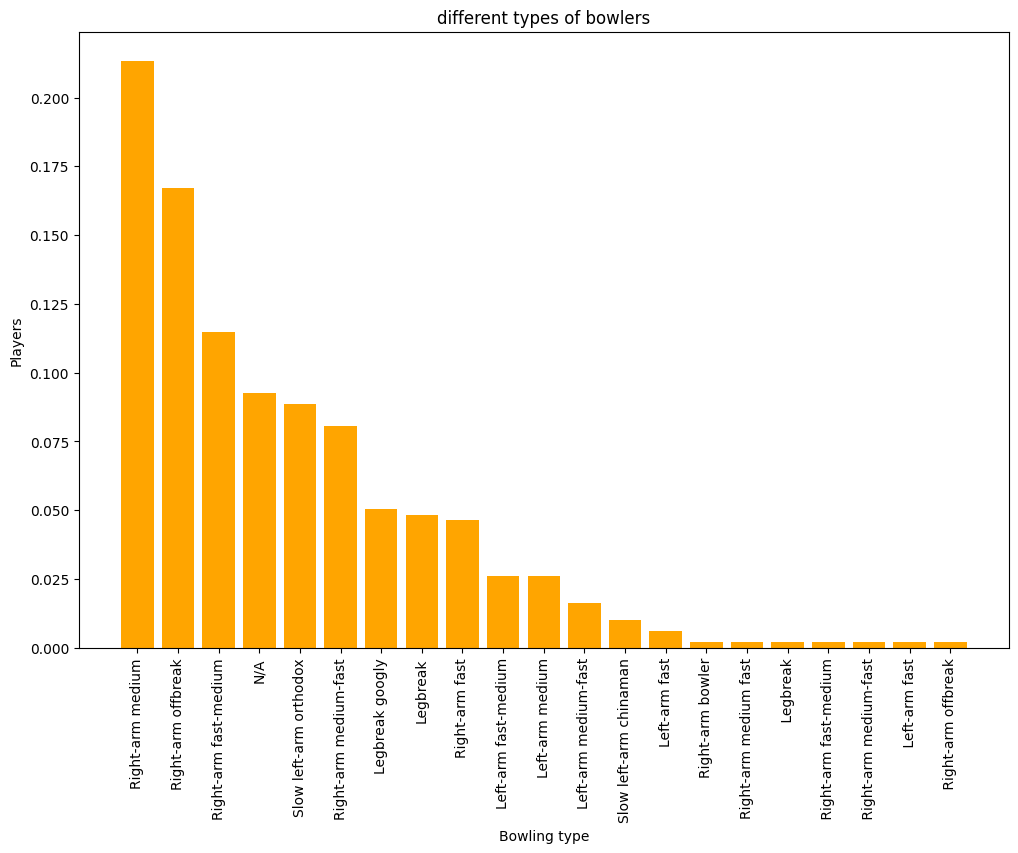

In [15]:
#types of bowlers
bowl_skill=player['Bowling_skill'].value_counts(sort=True,normalize=True)
fig=plt.figure(figsize=(12,8))
plt.bar(bowl_skill.index,bowl_skill.values,color='orange')
plt.xlabel("Bowling type")
plt.ylabel("Players")
plt.title("different types of bowlers")
plt.xticks(rotation=90)
plt.show()

**Third Dataset**

In [16]:
p_match=pd.read_excel(r"C:\Users\Jatin Yadav\Desktop\project\Week_3\IPL-2007 dataset\DIM_PLAYER_MATCH.xlsx")

In [17]:
p_match

,Player_match_SK,PlayerMatch_key,Match_Id,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name,Role_Desc,...,Season_year,is_manofThematch,Age_As_on_match,IsPlayers_Team_won,Batting_Status,Bowling_Status,Player_Captain,Opposit_captain,Player_keeper,Opposit_keeper
0,-1,-1,-1,-1,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12694,33598700006,335987,6,R Dravid,1973-01-11,Right-hand bat,Right-arm offbreak,India,Captain,...,2008.0,0.0,35.0,0.0,NaN,NaN,R Dravid,SC Ganguly,MV Boucher,WP Saha
2,12695,33598700007,335987,7,W Jaffer,1978-02-16,Right-hand bat,Right-arm offbreak,India,Player,...,2008.0,0.0,30.0,0.0,NaN,NaN,R Dravid,SC Ganguly,MV Boucher,WP Saha
3,12696,33598700008,335987,8,V Kohli,1988-11-05,Right-hand bat,Right-arm medium,India,Player,...,2008.0,0.0,20.0,0.0,NaN,NaN,R Dravid,SC Ganguly,MV Boucher,WP Saha
4,12697,33598700009,335987,9,JH Kallis,1975-10-16,Right-hand bat,Right-arm fast-medium,South Africa,Player,...,2008.0,0.0,33.0,0.0,NaN,NaN,R Dravid,SC Ganguly,MV Boucher,WP Saha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13988,26681,108265000413,1082650,413,KH Pandya,1991-03-24,Left-hand bat,Slow left-arm orthodox,India,Player,...,2017.0,1.0,26.0,1.0,NaN,NaN,RG Sharma,SPD Smith,PA Patel,MS Dhoni
13989,26682,108265000430,1082650,430,A Zampa,1992-03-31,Right-hand bat,Legbreak googly,Australia,Player,...,2017.0,0.0,25.0,0.0,NaN,NaN,SPD Smith,RG Sharma,MS Dhoni,PA Patel
13990,26683,108265000483,1082650,483,LH Ferguson,1991-06-13,Right-hand bat,Right-arm fast,New Zealand,Player,...,2017.0,0.0,26.0,0.0,NaN,NaN,SPD Smith,RG Sharma,MS Dhoni,PA Patel
13991,26684,108265000488,1082650,488,RA Tripathi,1991-03-02,Right-hand bat,Right-arm medium,India,Player,...,2017.0,0.0,26.0,0.0,NaN,NaN,SPD Smith,RG Sharma,MS Dhoni,PA Patel


In [18]:
p_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13993 entries, 0 to 13992
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Player_match_SK     13993 non-null  int64         
 1   PlayerMatch_key     13993 non-null  int64         
 2   Match_Id            13993 non-null  int64         
 3   Player_Id           13993 non-null  int64         
 4   Player_Name         13992 non-null  object        
 5   DOB                 13992 non-null  datetime64[ns]
 6   Batting_hand        13992 non-null  object        
 7   Bowling_skill       12862 non-null  object        
 8   Country_Name        13992 non-null  object        
 9   Role_Desc           13992 non-null  object        
 10  Player_team         13992 non-null  object        
 11  Opposit_Team        13992 non-null  object        
 12  Season_year         13992 non-null  float64       
 13  is_manofThematch    13992 non-null  float64   

In [19]:
p_match.isnull().sum()

Player_match_SK           0
PlayerMatch_key           0
Match_Id                  0
Player_Id                 0
Player_Name               1
DOB                       1
Batting_hand              1
Bowling_skill          1131
Country_Name              1
Role_Desc                 1
Player_team               1
Opposit_Team              1
Season_year               1
is_manofThematch          1
Age_As_on_match           1
IsPlayers_Team_won        1
Batting_Status        13993
Bowling_Status        13993
Player_Captain            1
Opposit_captain           1
Player_keeper             1
Opposit_keeper            1
dtype: int64

In [20]:
p_match.drop(['Batting_Status'],axis=1,inplace=True)
p_match.drop(['Bowling_Status'],axis=1,inplace=True)
p_match['Bowling_skill'].fillna("N/A",inplace=True)

([<matplotlib.patches.Wedge at 0x214fe51eb90>,
 [Text(-0.9570423841242536, 0.5422820990865962, 'Player'),
  Text(0.765496858519787, -0.7899459219442414, 'Captain'),
  Text(1.0365588566902764, -0.3681653658574459, 'Keeper'),
  Text(1.0982951094002733, -0.061219708162011055, 'CaptainKeeper')],
 [Text(-0.5220231186132291, 0.2957902358654161, '83.6%'),
  Text(0.41754374101079283, -0.43087959378776797, '7.3%'),
  Text(0.565395740012878, -0.20081747228587957, '7.3%'),
  Text(0.5990700596728763, -0.03339256808836966, '1.8%')])

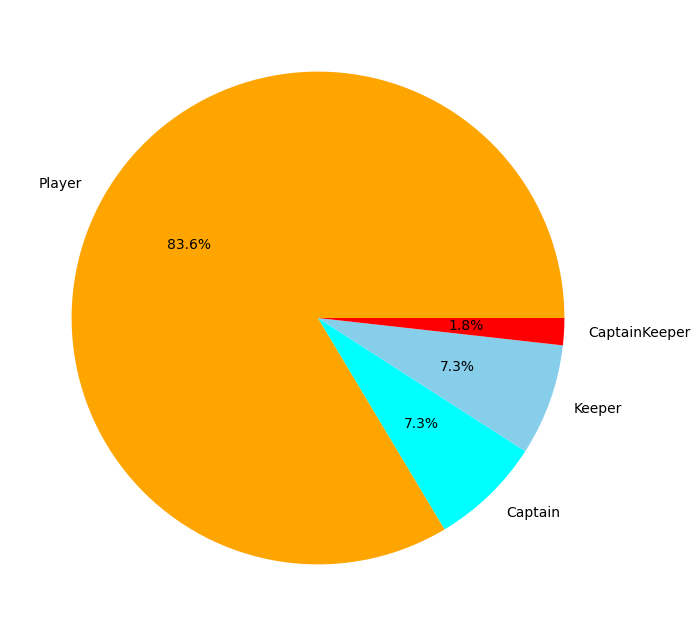

In [21]:
role=p_match['Role_Desc'].value_counts(sort=True)
fig=plt.figure(figsize=(12,8))
plt.pie(role,labels=role.index,colors=['orange','aqua','skyblue','red','yellow'],autopct='%1.1f%%',)

([<matplotlib.patches.Wedge at 0x214fe306d40>,
 [Text(-0.7013110389937394, 0.8474448811489287, 'Right-hand bat'),
  Text(0.7013110389937388, -0.8474448811489291, 'Left-hand bat')],
 [Text(-0.38253329399658503, 0.4622426624448701, '72.0%'),
  Text(0.3825332939965848, -0.4622426624448704, '28.0%')])

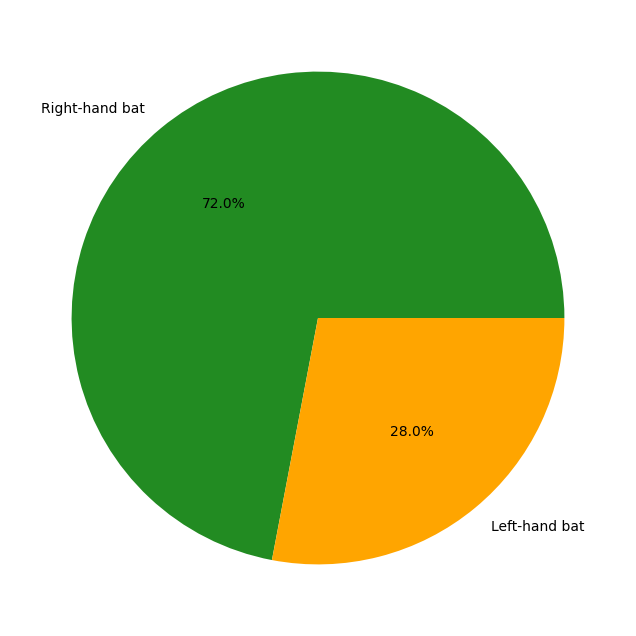

In [22]:
B_hand=p_match['Batting_hand'].value_counts(sort=True)
fig=plt.figure(figsize=(12,8))
plt.pie(B_hand,labels=B_hand.index,autopct='%1.1f%%',colors=['forestgreen','orange'])
